Step 1: Import necessary packages

In [3]:
import pandas as pd  # For reading and handling data
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting feature importance

from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm
from sklearn.model_selection import train_test_split  # To split train and test sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics

Step 2: Load the dataset

In [4]:
data = pd.read_csv("Testing.csv")

Step 3: Organize features (X) and labels (y)

In [5]:
X = data.drop("prognosis", axis=1)  # All columns except target
y = data["prognosis"]               # Target column (disease)

Step 4: Split dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

Step 5: Build and train the Random Forest model

In [7]:
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
# n_estimators=100 → number of decision trees
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Step 6: Get accuracy on training and testing subsets

In [8]:
print("Accuracy on the training subset: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on the testing subset: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the testing subset: 0.000


Step 7: Detailed evaluation

In [12]:
y_pred = forest.predict(X_test)  
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00       1.0
                                   Acne       0.00      0.00      0.00       1.0
                                Allergy       0.00      0.00      0.00       0.0
                       Bronchial Asthma       0.00      0.00      0.00       0.0
                   Cervical spondylosis       0.00      0.00      0.00       0.0
                              Diabetes        0.00      0.00      0.00       0.0
           Dimorphic hemmorhoids(piles)       0.00      0.00      0.00       1.0
                          Drug Reaction       0.00      0.00      0.00       1.0
                       Fungal infection       0.00      0.00      0.00       0.0
                           Heart attack       0.00      0.00      0.00       0.0
                          Hypertension        0.00      0.00      0.00       1.0
  

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

Step 8: Feature Importance (which symptoms matter most)

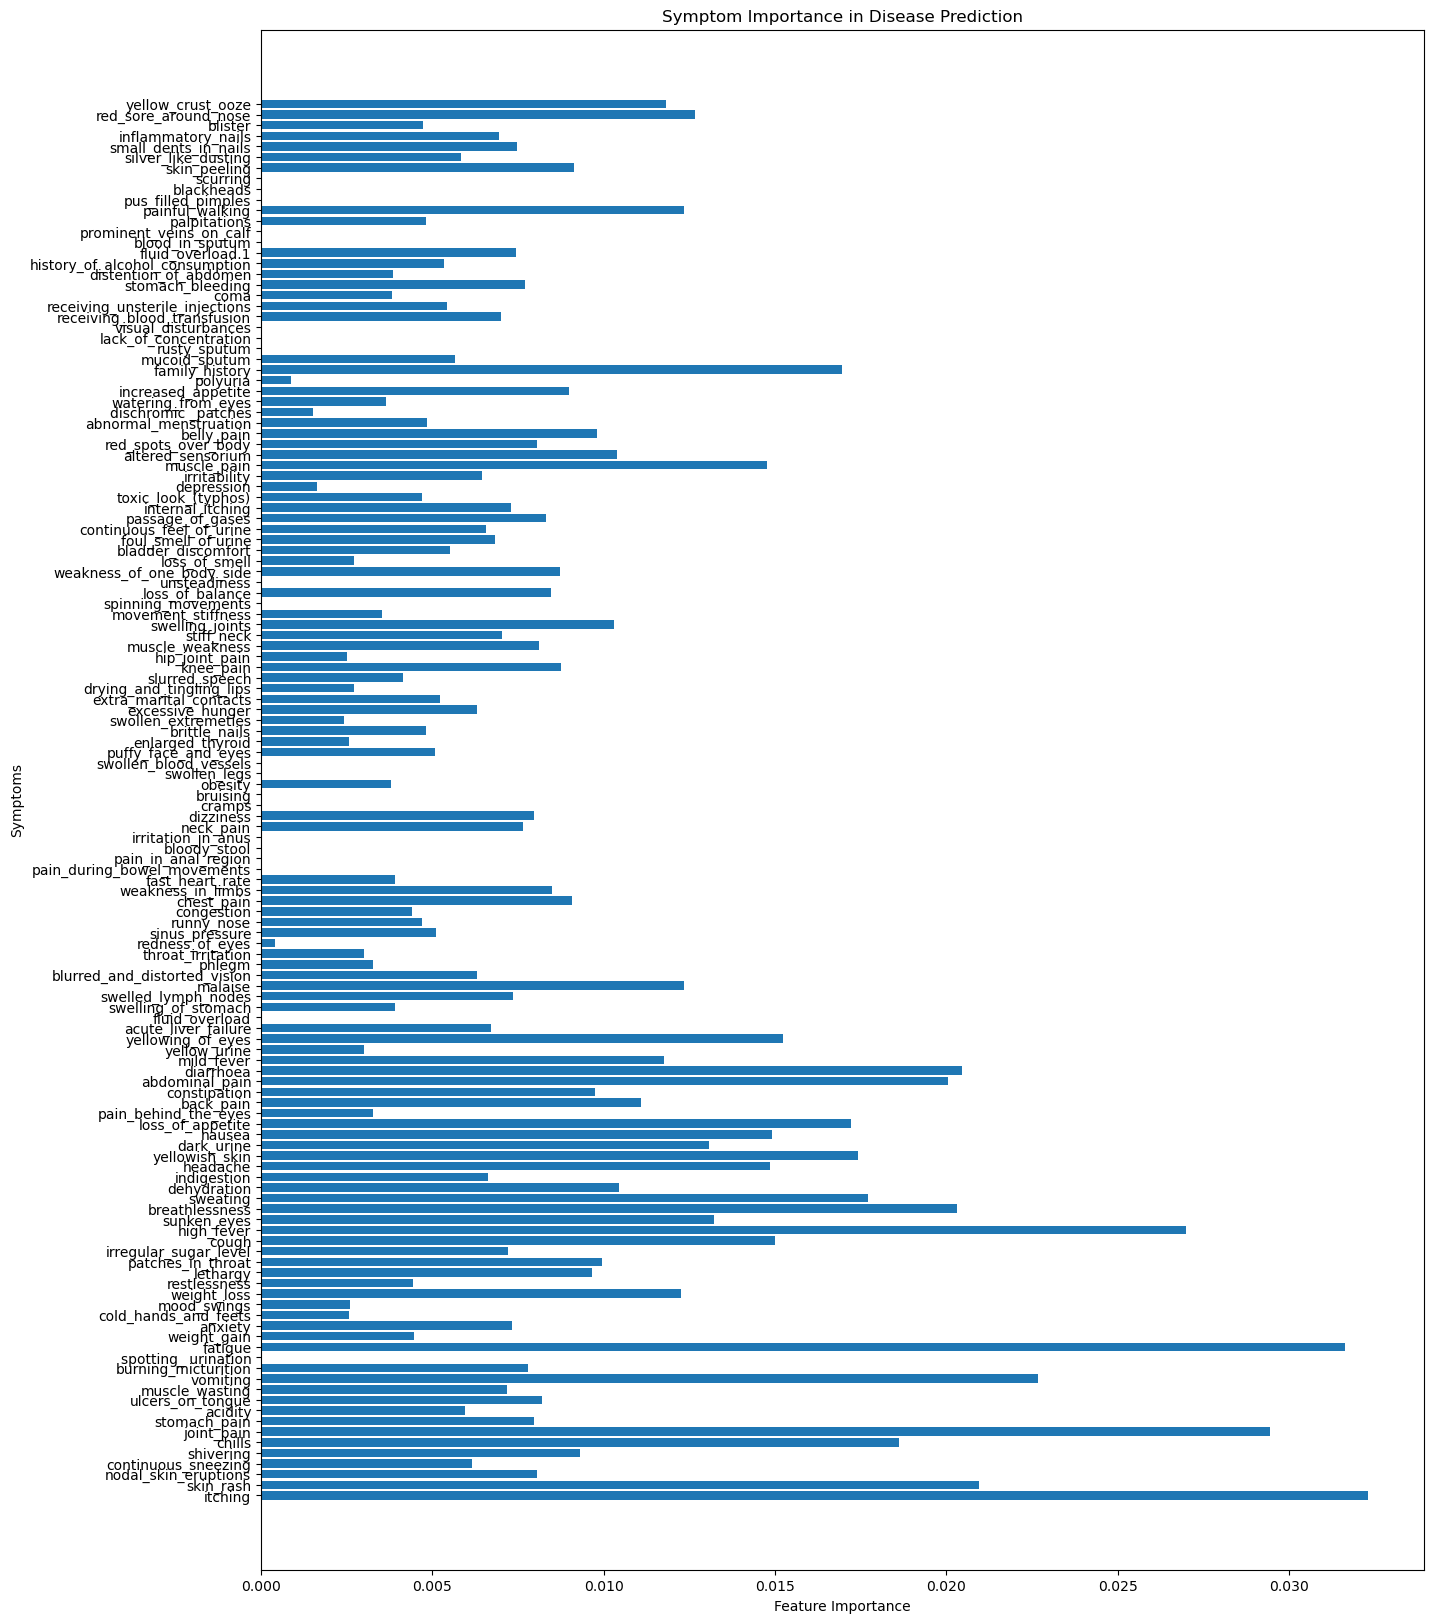

In [17]:
n_features = X.shape[1]  # Number of symptoms/features
plt.figure(figsize=(15, 20))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)  # Show symptom names on y-axis
plt.xlabel("Feature Importance")
plt.ylabel("Symptoms")
plt.title("Symptom Importance in Disease Prediction")
plt.show()